##   Sales prediction-Codsoft task 4

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [37]:
adv=pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\5thsem\\datasets(codsoft)\\advertising.csv")

In [38]:
adv.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [39]:
#check for null values
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [40]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [41]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### outlier detection using boxplot

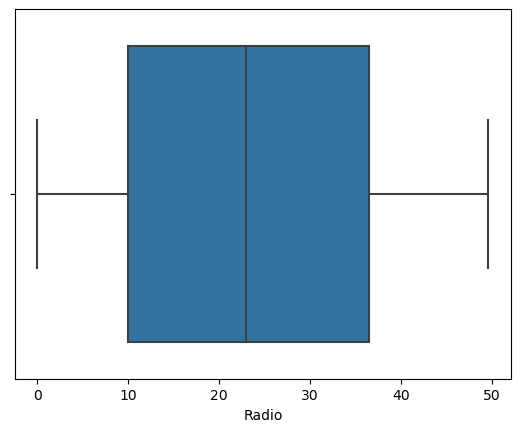

In [42]:
sns.boxplot(x='Radio', data=adv)
plt.show()

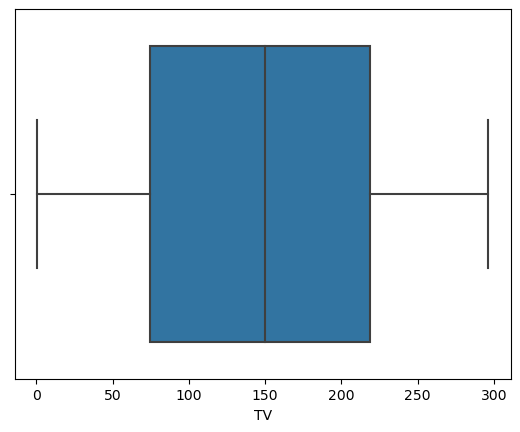

In [43]:
sns.boxplot(x='TV', data=adv)
plt.show()

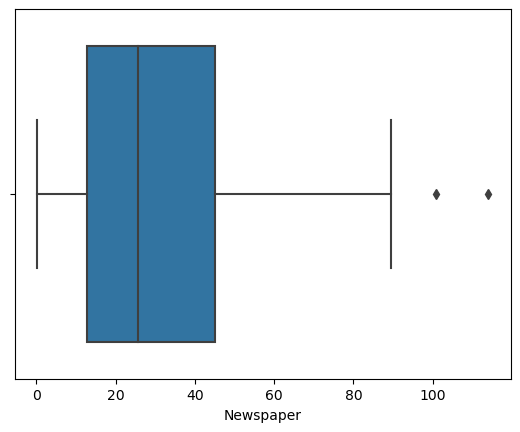

In [44]:
sns.boxplot(x='Newspaper', data=adv)
plt.show()

#### SINCE NEWSPAPER HAS OUTLIERS WE TREAT THE OUTLIERS

In [45]:
# Outlier treatment with Z Score for 'newspaper' column in DataFrame 'adv'
threshold = 3
outlier = []

for i in adv['Newspaper']:
    z = (i - adv['Newspaper'].mean()) / adv['Newspaper'].std()
    if z > threshold:
        outlier.append(i)

print('Outliers in the Newspaper column:', outlier)
print('Minimum value of the outliers:', min(outlier))

# Calculate the median for the 'newspaper' column excluding outliers
median_newspaper = adv.loc[adv['Newspaper'] <= min(outlier), 'Newspaper'].median()
print('Median of the column excluding outliers:', median_newspaper)

# Replace outliers with median in 'newspaper' column
adv['out_treated_newspaper'] = adv['Newspaper'].apply(lambda x: median_newspaper if x >= min(outlier) else x)

print('Maximum value after outlier treatment:', max(adv['out_treated_newspaper']))

# Drop the original 'newspaper' column
adv.drop(['Newspaper'], axis=1, inplace=True)


Outliers in the Newspaper column: [114.0, 100.9]
Minimum value of the outliers: 100.9
Median of the column excluding outliers: 25.6
Maximum value after outlier treatment: 89.4


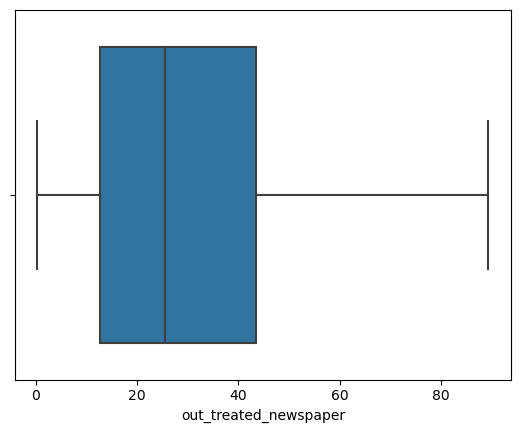

In [46]:
sns.boxplot(x='out_treated_newspaper', data=adv)
plt.show()

#### train testing data 

In [47]:
y=adv['Sales']
X=adv.drop('Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test,y_test], axis = 1)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
reg_model = model.fit()
print(reg_model.summary())

### pretty accurate by seeing adj. R-square its 90% accurate

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     498.1
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.18e-79
Time:                        22:44:04   Log-Likelihood:                -309.13
No. Observations:                 160   AIC:                             626.3
Df Residuals:                     156   BIC:                             638.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.62

In [48]:
# Assuming 'train_data' and 'test_data' are your original DataFrames with columns 'Sales', 'Newspaper', 'TV', and 'Radio'

# Selecting the independent variables for prediction
independent_vars = ['out_treated_newspaper', 'TV', 'Radio']

# Creating the training dataset for prediction
train_data_for_pred = train_data[independent_vars]
train_data_for_pred = sm.add_constant(train_data_for_pred)  # Add a constant for the intercept

# Predict using the regression model (reg_model2) assuming it's already trained
train_pred = reg_model.predict(train_data_for_pred)

# Creating the test dataset for prediction
test_data_for_pred = test_data[independent_vars]
test_data_for_pred = sm.add_constant(test_data_for_pred)  # Add a constant for the intercept

# Predict for the test dataset
test_pred = reg_model.predict(test_data_for_pred)


In [49]:
# Calculating residuals for the training data
train_residuals = train_data['Sales'] - train_pred

# Calculating residuals for the test data
test_residuals = test_data['Sales'] - test_pred


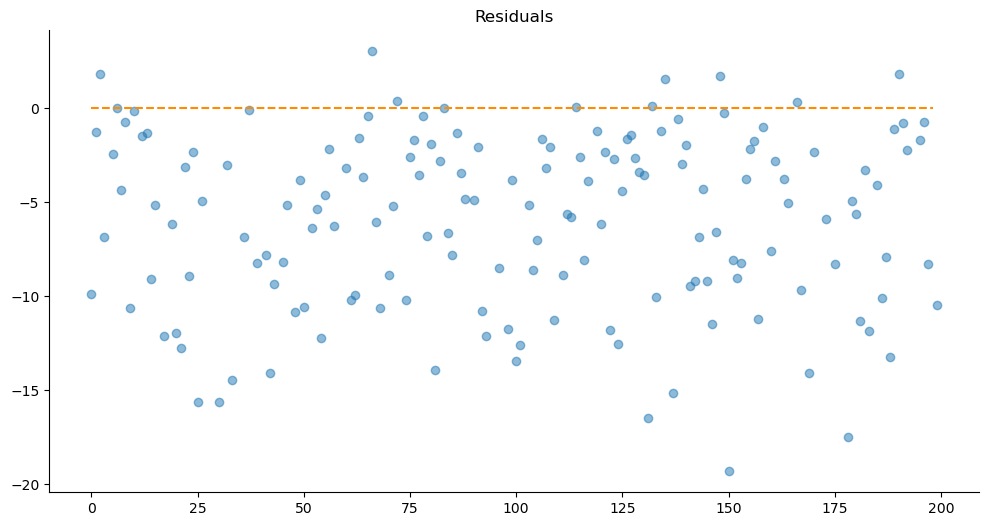

In [59]:
train_residuals = pd.DataFrame(train_residuals)
train_residuals.columns = ['Residuals']

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=train_residuals.index, y=train_residuals.Residuals, alpha=0.5)
plt.plot(np.repeat(0, train_residuals.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show() 

In [64]:
## iteration1

X = adv[['TV','out_treated_newspaper']] 
Y = adv['Sales']

#Train Model
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
model_sum = model.summary()
print(model_sum)

#Sales Prediction
sales_pred = model.predict(X) 

#the adj r square has decreased than previous thus this cant be considered

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     452.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.09e-74
Time:                        22:56:42   Log-Likelihood:                -444.25
No. Observations:                 200   AIC:                             894.5
Df Residuals:                     197   BIC:                             904.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.74

In [66]:
# iteration 2
X = adv[['TV','Radio']] 
Y = adv['Sales']

#Train Model
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
model_sum = model.summary()
print(model_sum)

#Sales Prediction
sales_pred = model.predict(X) 

# better than the previous iteration

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     917.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          1.43e-100
Time:                        22:57:51   Log-Likelihood:                -383.08
No. Observations:                 200   AIC:                             772.2
Df Residuals:                     197   BIC:                             782.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1949      0.287     14.595      0.0

In [68]:
# iteration 3
X = adv[['out_treated_newspaper','Radio']] 
Y = adv['Sales']

#Train Model
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
model_sum = model.summary()
print(model_sum)

#Sales Prediction
sales_pred = model.predict(X) 

# worst than the previous iteration and original so not considering this

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     14.42
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.44e-06
Time:                        22:59:06   Log-Likelihood:                -602.82
No. Observations:                 200   AIC:                             1212.
Df Residuals:                     197   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.59

In [75]:
# iteration 4
X = adv['Radio']
Y = adv['Sales']

#Train Model
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
model_sum = model.summary()
print(model_sum)

#Sales Prediction
sales_pred = model.predict(X) 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     28.69
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.35e-07
Time:                        23:08:58   Log-Likelihood:                -602.95
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7718      0.644     18.281      0.0

In [76]:
# iteration 5
X = adv['TV']
Y = adv['Sales']

#Train Model
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
model_sum = model.summary()
print(model_sum)

#Sales Prediction
sales_pred = model.predict(X) 

# in TV and Radio TV drives Sales most 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     839.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.72e-73
Time:                        23:09:00   Log-Likelihood:                -450.82
No. Observations:                 200   AIC:                             905.6
Df Residuals:                     198   BIC:                             912.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5369      0.325     20.125      0.0

### Radio & TV drives the Sales the most 

In [60]:
'''White test :- H0: homoskedasticity Ha: heteroskedasticity'''

white_test = het_white(reg_model.resid,  reg_model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 20.602123433120383, 'Test Statistic p-value': 0.014539139900829494, 'F-Statistic': 2.4632277932913844, 'F-Test p-value': 0.01199971546208691}


### data visualization

C:\Users\prasanna\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

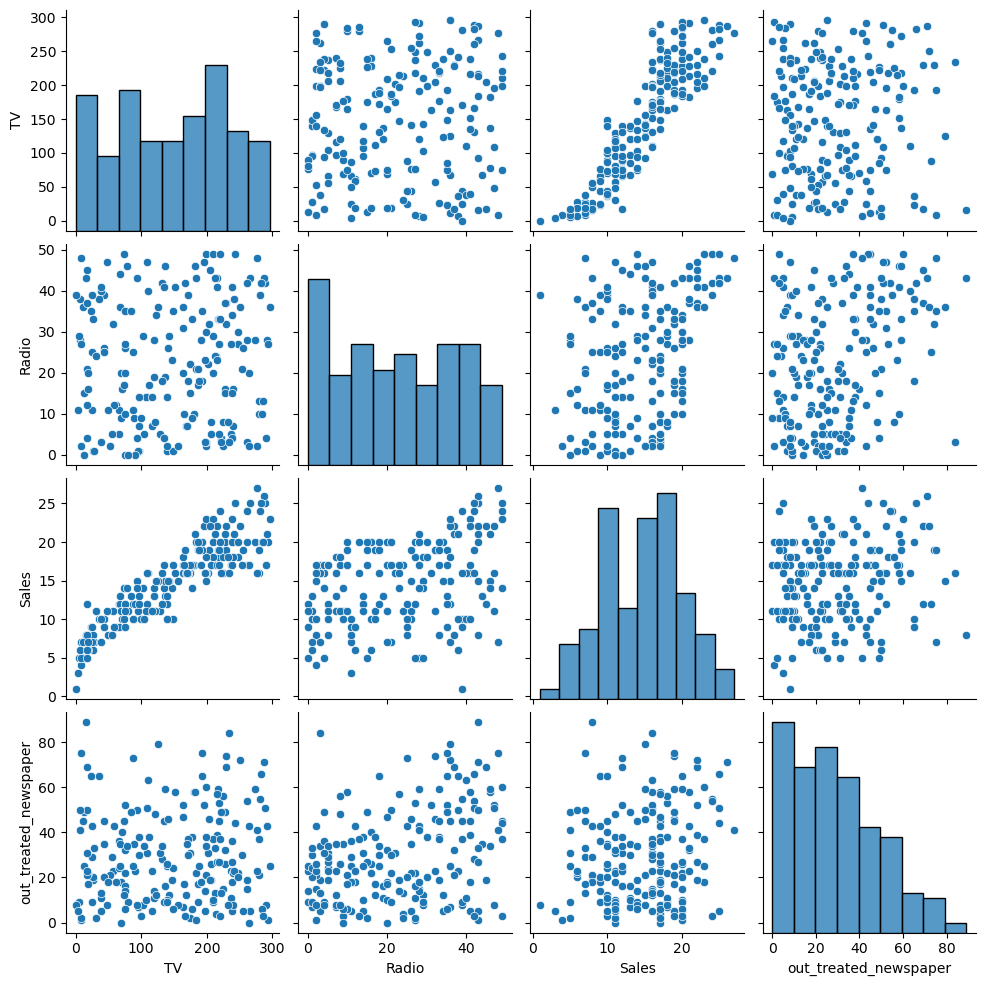

In [69]:
plt.figure(figsize=(10,5))
sns.pairplot(adv)
plt.show()

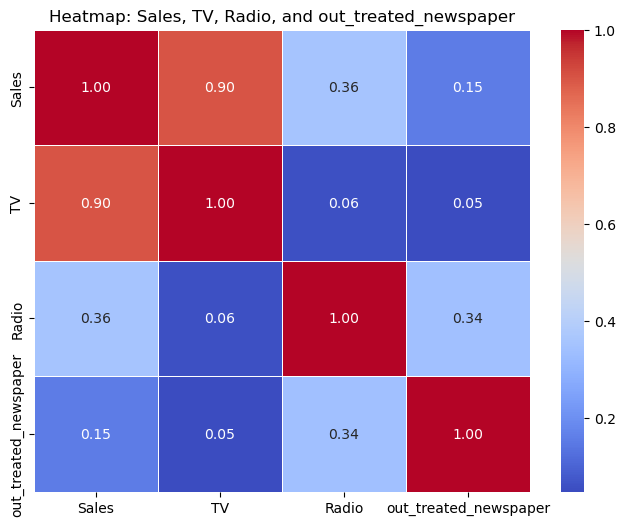

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['Sales', 'TV', 'Radio', 'out_treated_newspaper']
data_for_heatmap = adv[selected_columns]

# Compute the correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap: Sales, TV, Radio, and out_treated_newspaper')
plt.show()


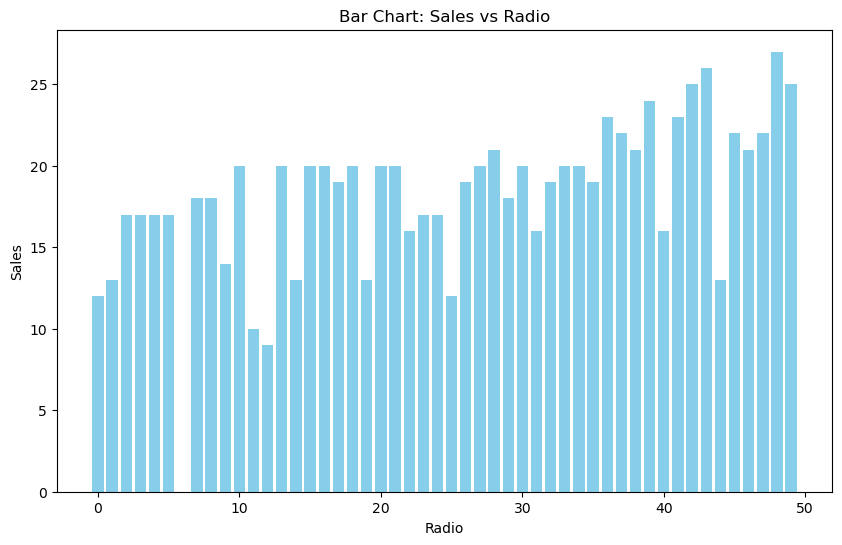

In [72]:
import matplotlib.pyplot as plt
sales = adv['Sales']
tv = adv['Radio']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tv, sales, color='skyblue')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Bar Chart: Sales vs Radio')
plt.show()


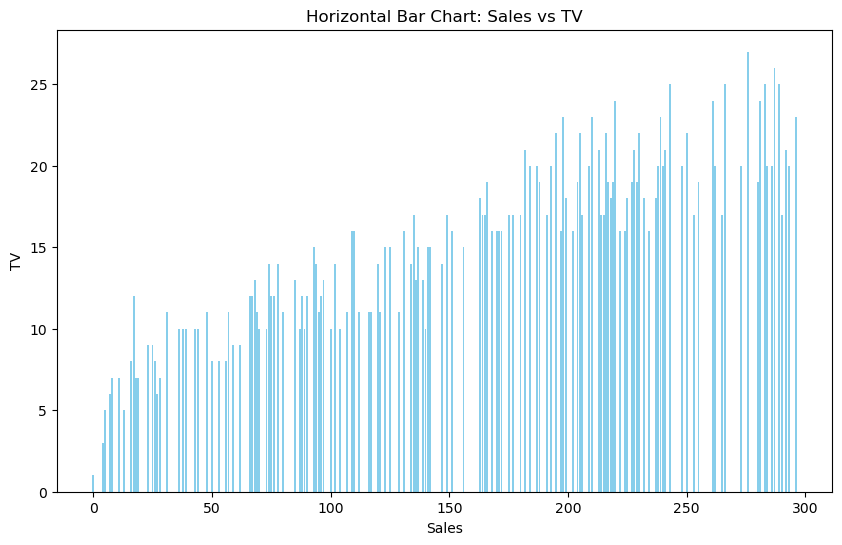

In [79]:
import matplotlib.pyplot as plt
sales = adv['Sales']
tv = adv['TV']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.bar(tv, sales, color='skyblue')
plt.ylabel('TV')
plt.xlabel('Sales')
plt.title('Horizontal Bar Chart: Sales vs TV')
plt.show()

